In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.datasets import make_blobs, make_moons

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [92]:
from sklearn.cluster import KMeans

In [93]:
#Carga de CSVs
train_df = pd.read_csv("../Preprocesamiento/train_preproc.csv",sep=',',encoding='UTF-8')

In [94]:
X = train_df.loc[:,['Warehouse_block','Mode_of_Shipment','Customer_care_calls','Cost_of_the_Product','Prior_purchases','Product_importance','Discount_offered','Weight_in_gms']]
Y = train_df['Reached.on.Time_Y.N'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42) 

### **`Elbow`**
Utilizamos la distancia al centroide. Luego, graficamos la curva que nos permite determinar el K óptimo.

In [95]:
# Creamos una lista donde iremos guardando las distancias medias
Sum_of_squared_distances = []

# Entrenamos un modelo para cada número de cluster que queremos testear
K = np.arange(2,14) # array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X.shape[0])
    Sum_of_squared_distances.append(distancia_media) # Inercia del modelo es igual al cuadrado de la distancia entre el centroide y el punto evaluado.

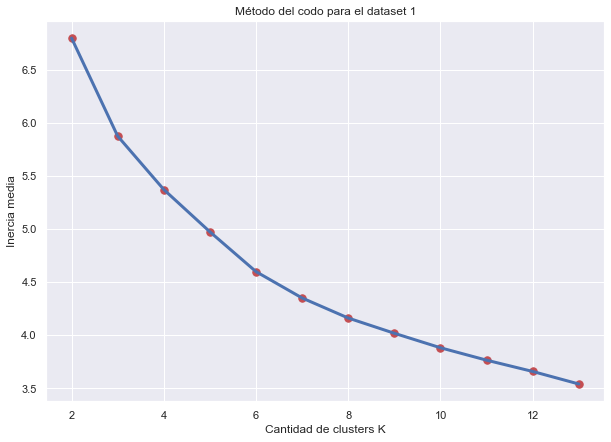

In [96]:
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el dataset 1')

plt.show()

### **`Silhouette`**

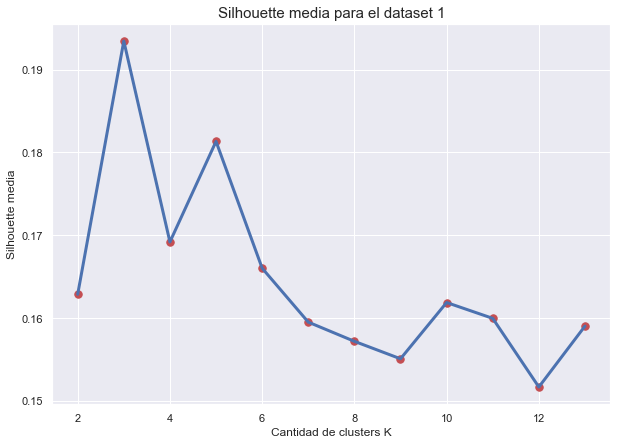

In [97]:
# Creamos una lista donde iremos guardando los valores medios de silhouette
lista_sil = []

# Entrenamos un modelo para cada número de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_ # Número de clusteres (o etiquetas): array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X_train, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el dataset 1', fontsize = 15)

plt.show()

In [98]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Creamos una máscara
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Número estimado de clusters: %d' % n_clusters_1, fontsize = 15)
    plt.show()
    return

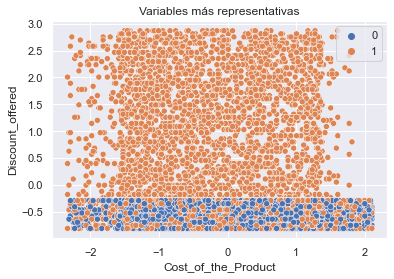

In [99]:
X2 = X.loc[:,['Cost_of_the_Product','Discount_offered']].values
y2 = Y

sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.title('Variables más representativas')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.show()

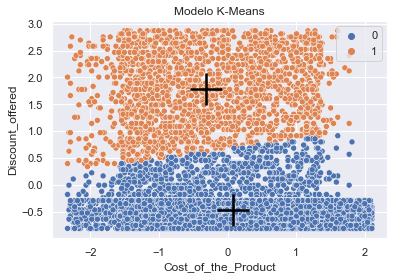

In [100]:
kmeans_2 = KMeans(n_clusters=2, random_state=0,algorithm='lloyd')
kmeans_2.fit(X2)

# Centros y etiquetas
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_

# Gráficamos
sns.scatterplot(x = X2[:, 0], y = X2[:, -1], hue = etiquetas_2)
sns.scatterplot(x = centros_2[:, 0], y = centros_2[:, 1],color='black', marker="+", s=1000)
plt.title('Modelo K-Means')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.show()

In [ ]:
y_pred = kmeans_2.predict(X)

KMeans(n_clusters=2, random_state=0)

In [88]:
# Hyperparameter search space
search_space = {
    'algorithm': ['lloyd', 'elkan', 'auto', 'full'],
    'n_clusters': [2], 
    'random_state': [24,42,96]
}

In [89]:
# Probamos la estrategia grid search
from sklearn.model_selection import GridSearchCV #cv: cross validation

# Le pasamos la grilla que creamos
model = GridSearchCV(kmeans_2, param_grid=search_space, cv=4)

# Entrenamos
model.fit(X2)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

C:\Users\marco\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\marco\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\marco\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\marco\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\marco\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 

Mejores hiperparámetros: {'algorithm': 'elkan', 'n_clusters': 2, 'random_state': 96}
Mejor Score: -3710.3954245979194



In [ ]:
y_pred = kmeans_2.predict(X)
# Vemos la sensibilidad o recall.
#print('recall:',recall_score(y_test,y_pred))
print('recall:',recall_score(Y,y_pred))
# Vemos la precisión.
#print('accuracy:',accuracy_score(y_test,y_pred))
print('accuracy:',accuracy_score(Y,y_pred))
# Predecimos para la data test
entrenamiento_test = test_df.loc[:,['Warehouse_block','Mode_of_Shipment','Customer_care_calls','Cost_of_the_Product','Prior_purchases','Product_importance','Discount_offered','Weight_in_gms']]
y_pred_test = kmeans_2.predict(entrenamiento_test) #Predice valores para la subtabla pred_test
